# –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä –æ—Ç–∑—ã–≤–æ–≤

## –ò–º–ø–æ—Ä—Ç –±–∏–±–ª–∏–æ—Ç–µ–∫

In [ ]:
import wget

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud

%matplotlib inline

## EDA

### –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

In [2]:
url = 'https://github.com/yandex/geo-reviews-dataset-2023/raw/refs/heads/master/geo-reviews-dataset-2023.tskv'
filename = wget.download(url)

### –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º

In [123]:
# –°—á–∏—Ç–∞–µ–º –ø—Ä–∏ –ø–æ–º–æ—â–∏ pandas –∏—Å—Ö–æ–¥–Ω—ã–π —Ñ–∞–π–ª —Å —Ç–∞–±—É–ª—è—Ü–∏–µ–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ —Ä–∞–∑–¥–µ–ª–∏—Ç–µ–ª—è, –∑–∞–¥–∞–≤ –Ω—É–∂–Ω—ã–µ –Ω–∞–º –∏–º–µ–Ω–∞ –∫–æ–ª–æ–Ω–æ–∫
df = pd.read_csv('geo-reviews-dataset-2023.tskv', sep='\t', header=None, names=['address', 'name_ru', 'rating', 'rubrics', 'text'])
columns = df.columns.to_list()
# –ü—Ä–æ–π–¥–µ–º –≤ —Ü–∏–∫–ª–µ –ø–æ –∫–æ–ª–æ–Ω–∫–∞–º –∏ —É–¥–∞–ª–∏–º –∏–∑ —è—á–µ–µ–∫ –∫–ª—é—á–∏
for column in columns:
    df[column] = df[column].replace(f'{column}=', '', regex=True)

In [124]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º –ø–µ—Ä–≤—ã–µ —Å—Ç—Ä–æ–∫–∏
df.head()

address             name_ru  \
0  –ï–∫–∞—Ç–µ—Ä–∏–Ω–±—É—Ä–≥, —É–ª. –ú–æ—Å–∫–æ–≤—Å–∫–∞—è / —É–ª. –í–æ–ª–≥–æ–≥—Ä–∞–¥—Å–∫...  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª   
1  –ú–æ—Å–∫–æ–≤—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –≠–ª–µ–∫—Ç—Ä–æ—Å—Ç–∞–ª—å, –ø—Ä–æ—Å–ø–µ–∫—Ç –õ–µ–Ω...   –ü—Ä–æ–¥—É–∫—Ç—ã –ï—Ä–º–æ–ª–∏–Ω–æ   
2  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä, –ü—Ä–∏–∫—É–±–∞–Ω—Å–∫–∏–π –≤–Ω—É—Ç—Ä–∏–≥–æ—Ä–æ–¥—Å–∫–æ–π –æ–∫—Ä—É–≥,...             LimeFit   
3   –°–∞–Ω–∫—Ç-–ü–µ—Ç–µ—Ä–±—É—Ä–≥, –ø—Ä–æ—Å–ø–µ–∫—Ç –≠–Ω–≥–µ–ª—å—Å–∞, 111, –∫–æ—Ä–ø. 1        Snow-Express   
4                  –¢–≤–µ—Ä—å, –í–æ–ª–æ–∫–æ–ª–∞–º—Å–∫–∏–π –ø—Ä–æ—Å–ø–µ–∫—Ç, 39  –°—Ç—É–¥–∏—è Beauty Brow   

  rating                                            rubrics  \
0     3.                                     –ñ–∏–ª–æ–π –∫–æ–º–ø–ª–µ–∫—Å   
1     5.  –ú–∞–≥–∞–∑–∏–Ω –ø—Ä–æ–¥—É–∫—Ç–æ–≤;–ü—Ä–æ–¥—É–∫—Ç—ã –≥–ª—É–±–æ–∫–æ–π –∑–∞–º–æ—Ä–æ–∑–∫–∏;...   
2     1.                                        –§–∏—Ç–Ω–µ—Å-–∫–ª—É–±   
3     4.        –ü—É–Ω–∫—Ç –ø—Ä–æ–∫–∞—Ç–∞;–ü—Ä–æ–∫–∞—Ç –≤–µ–ª–æ—Å–∏–ø–µ–¥–æ–≤;–°–∞–ø—Å—ë—Ä—Ñ–∏–Ω–≥   
4     5.  –°–∞–ª–æ–Ω –∫—Ä–∞—Å–æ—Ç—ã;–í–∏–∑–∞–∂–∏—Å—Ç—ã, —Å—Ç–∏–ª–∏—Å—Ç—ã;–°–∞–ª–æ–Ω –±—Ä–æ–≤–µ–π...   

                                                text  
0  –ú–æ—Å–∫–æ–≤—Å–∫–∏–π –∫–≤–∞—Ä—Ç–∞–ª 2.\n–®—É–º–Ω–æ : –ª–µ—Ç–æ–º –ø–æ –Ω–æ—á–∞–º ...  
1  –ó–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–∞—è —Å–µ—Ç—å –º–∞–≥–∞–∑–∏–Ω–æ–≤ –≤ –æ–±—â–µ–º, —Ö–æ—Ä–æ—à–∏–π ...  
2  –ù–µ –∑–Ω–∞—é —Å–º—É—Ç—è—Ç –ª–∏ –∫–æ–≥–æ-—Ç–æ –¥–∞–Ω–Ω—ã–µ –ø—Ä–∞–≤–∏–ª–∞, –Ω–æ —è...  
3  –•–æ—Ä–æ—à–∏–µ —É—Å–ª–æ–≤–∏—è –∞—Ä–µ–Ω–¥—ã. \n–î—Ä—É–∂–µ–ª—é–±–Ω—ã–π –ø–µ—Ä—Å–æ–Ω–∞–ª...  
4  –¢–æ–ø –º–∞—Å—Ç–µ—Ä –ê–Ω–≥–µ–ª–∏–Ω–∞ —Ç–æ–ø –≤–æ –≤—Å–µ—Ö —Å–º—ã—Å–ª–∞—Ö ) –ù–µ–º–Ω...

### –ë–∞–∑–æ–≤—ã–π –∞–Ω–∞–ª–∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞

–ü–æ—Å–º–æ—Ç—Ä–∏–º –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –ø–æ –Ω–∞—à–µ–º—É –¥–∞—Ç–∞—Ñ—Ä–µ–π–º—É

In [4]:
# –†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞
print(f'–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: {df.shape}')

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞: (500000, 5)


In [5]:
# –¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö
print(df.dtypes)

address    object
name_ru    object
rating     object
rubrics    object
text       object
dtype: object


In [6]:
# –ö–æ–ª-–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
df.nunique()

address    191925
name_ru    148461
rating        393
rubrics     32694
text       498918
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   address  500000 non-null  object
 1   name_ru  500000 non-null  object
 2   rating   500000 non-null  object
 3   rubrics  500000 non-null  object
 4   text     499030 non-null  object
dtypes: object(5)
memory usage: 19.1+ MB


–í–∏–¥–∏–º, —á—Ç–æ –≤ –∫–æ–ª–æ–Ω–∫–µ 'text' –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è. –ü–æ—Å–∫–æ–ª—å–∫—É –¥–∞–Ω–Ω—ã—Ö —É –Ω–∞—Å –æ—á–µ–Ω—å –º–Ω–æ–≥–æ, –∏ —Ü–µ–ª–∏–∫–æ–º –¥–∞—Ç–∞—Å–µ—Ç –º—ã –≤—Å–µ —Ä–∞–≤–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –Ω–µ –±—É–¥–µ–º (—Ç–∞–∫ –∫–∞–∫ –¥–æ–æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π —Ç–æ–≥–¥–∞ —Ä–∞—Å—Ç—è–Ω–µ—Ç—Å—è –Ω–∞ –Ω–µ—Å–∫–æ–ª—å–∫–æ –Ω–µ–¥–µ–ª—å), –ø—Ä–æ—Å—Ç–æ —É–¥–∞–ª–∏–º –≤—Å–µ —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –µ—Å—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

In [125]:
df = df.dropna(ignore_index=True)

In [126]:
# –ü—Ä–æ–≤–µ—Ä–∏–º –Ω–∞–ª–∏—á–∏–µ –¥—É–±–ª–∏–∫–∞—Ç–æ–≤
duplicates = df.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

np.int64(1)

In [127]:
df.loc[df.duplicated(keep=False), :]

address        name_ru rating  \
123882  –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫, –Ø—Å—Ç—ã–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 14  –°–ø–∞—Ä—Ç–∞ –ú–∞—Ä–∫–µ—Ç     5.   
123884  –ö—Ä–∞—Å–Ω–æ—è—Ä—Å–∫, –Ø—Å—Ç—ã–Ω—Å–∫–∞—è —É–ª–∏—Ü–∞, 14  –°–ø–∞—Ä—Ç–∞ –ú–∞—Ä–∫–µ—Ç     5.   

                                                  rubrics  \
123882  –ê–≤—Ç–æ–∞–∫—É—Å—Ç–∏–∫–∞;–¢–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∞–≤—Ç–æ—Å—Ç—ë–∫–æ–ª;–ü–ª—ë–Ω–∫–∏ –∞—Ä—Ö...   
123884  –ê–≤—Ç–æ–∞–∫—É—Å—Ç–∏–∫–∞;–¢–æ–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –∞–≤—Ç–æ—Å—Ç—ë–∫–æ–ª;–ü–ª—ë–Ω–∫–∏ –∞—Ä—Ö...   

                                                     text  
123882  –•–æ—Ä–æ—à–∏–µ –∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç—ã, –≤–µ–∂–ª–∏–≤—ã–µ.\n–í—Å–µ –ø–æ–º–æ–≥–ª–∏ ,...  
123884  –•–æ—Ä–æ—à–∏–µ –∫–æ–Ω—Å—É–ª—å—Ç–∞–Ω—Ç—ã, –≤–µ–∂–ª–∏–≤—ã–µ.\n–í—Å–µ –ø–æ–º–æ–≥–ª–∏ ,...

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, —É –Ω–∞—Å –µ—Å—Ç—å –æ–¥–∏–Ω –¥—É–±–ª–∏–∫–∞—Ç

In [128]:
# –¢–µ–ø–µ—Ä—å –æ–±—Ä–µ–∂–µ–º —Ç–æ—á–∫—É –ø–æ—Å–ª–µ —Ü–∏—Ñ—Ä—ã –≤ –∫–æ–ª–æ–Ω–∫–µ 'rating' –∏ –ø—Ä–∏–≤–µ–¥–µ–º –∫–æ–ª–æ–Ω–∫—É –∫ —Ç–∏–ø—É int64
df['rating'] = df['rating'].replace('\.', '', regex=True)
df['rating'] = pd.to_numeric(df['rating'])

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\User\AppData\Local\Temp\ipykernel_12192\3031245841.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['rating'] = df['rating'].replace('\.', '', regex=True)


–ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω—ã –æ—Ü–µ–Ω–∫–∏

<Axes: xlabel='rating', ylabel='Count'>

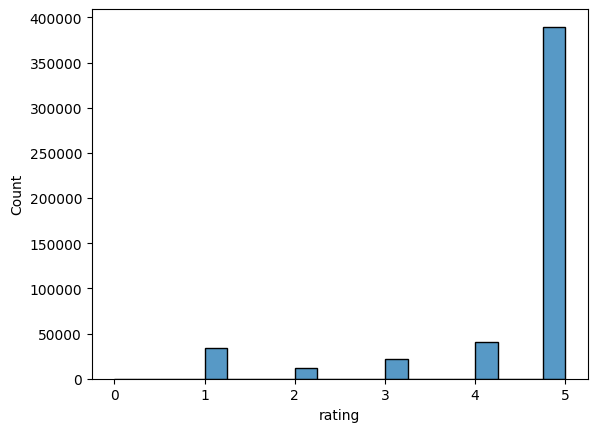

In [129]:
sns.histplot(df['rating'])

In [13]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –æ—Ç–∑—ã–≤—ã –Ω–∞ 0 –±–∞–ª–ª–æ–≤
df.query('rating == 0').head()

address            name_ru  \
1906   –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–∞—Ä–µ–ª–∏—è, –°—É–æ—è—Ä–≤–∏, —É–ª–∏—Ü–∞ –®–µ–ª—å—à–∞–∫–æ–≤–∞, 1  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ –ö–∞—Ä–µ–ª–∏—è   
2164                   –ö–µ–º–µ—Ä–æ–≤–æ, —É–ª–∏—Ü–∞ –¢—É—Ö–∞—á–µ–≤—Å–∫–æ–≥–æ, 12           –°–≤–µ—Ç–æ—Ñ–æ—Ä   
3583       –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –ê–Ω–∞–ø–∞, —É–ª–∏—Ü–∞ –ü—É—à–∫–∏–Ω–∞, 30             –ö—É–±–∞–Ω—å   
3614  –ö—Ä–∞—Å–Ω–æ–¥–∞—Ä—Å–∫–∏–π –∫—Ä–∞–π, –¢—É–∞–ø—Å–∏–Ω—Å–∫–∏–π —Ä–∞–π–æ–Ω, –ù–æ–≤–æ–º–∏—Ö...   –°—á–∞—Å—Ç–ª–∏–≤—ã–π –•–æ—Ç–µ–π   
6384      –õ–µ–Ω–∏–Ω–≥—Ä–∞–¥—Å–∫–∞—è –æ–±–ª–∞—Å—Ç—å, –í—ã–±–æ—Ä–≥, —É–ª–∏—Ü–∞ –ú–∏—Ä–∞, 8–ê             –ê—Ç—Ä–∏—É–º   

      rating                                            rubrics  \
1906       0                                          –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
2164       0  –ú–∞–≥–∞–∑–∏–Ω –∞–≤—Ç–æ–∑–∞–ø—á–∞—Å—Ç–µ–π –∏ –∞–≤—Ç–æ—Ç–æ–≤–∞—Ä–æ–≤;–ê–≤—Ç–æ–∞–∫—Å–µ—Å—Å...   
3583       0                                          –°–∞–Ω–∞—Ç–æ—Ä–∏–π   
3614       0                                          –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞   
6384       0                                     –¢–æ—Ä–≥–æ–≤—ã–π —Ü–µ–Ω—Ç—Ä   

                                                   text  
1906  –ì–æ—Å—Ç–∏–Ω–∏—Ü–∞ —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–Ω–∞ —É–¥–æ–±–Ω–æ, –µ—Å–ª–∏ –æ—Ç—Ä–µ–º–æ–Ω—Ç–∏—Ä...  
2164  –≠—Ç–æ –º–æ–π –ª—é–±–∏–º—ã–π –º–∞–≥–∞–∑–∏–Ω —Å –∑–∞–ø—á–∞—Å—Ç—è–º–∏. –ú–æ–∂–Ω–æ –≤—Å...  
3583  –ù–µ—Ç —Ä–∞—Å—Ç–∏—Ç–µ–ª—å–Ω–æ–≥–æ –º–∞—Å–ª–∞ –¥–ª—è —Å–∞–ª–∞—Ç–∞, –Ω–µ—Ç –∑—É–±–æ—á–∏...  
3614  –í—Å–µ –¥–æ–≤–æ–ª—å–Ω—ã, –∏ –≤–∑—Ä–æ—Å–ª—ã–µ –∏ –¥–µ—Ç–∏.\n–í–∫—É—Å–Ω–∞—è –µ–¥–∞....  
6384  –ë–æ–ª—å—à–æ–π –≤—ã–±–æ—Ä, –æ—á–µ–Ω—å –≥—Ä–∞–º–æ—Ç–Ω–æ –∏ —É–¥–æ–±–Ω–æ —Ä–∞–∑–ª–æ–∂–µ...

–ö–∞–∫ –º—ã –≤–∏–¥–∏–º, –æ—Ç–∑—ã–≤—ã –Ω–∞ 5 –∑–≤–µ–∑–¥ –ª—é–¥–∏ –æ—Å—Ç–∞–≤–ª—è—é—Ç –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ —á–∞—â–µ, —á–µ–º —Å –¥—Ä—É–≥–∏–º —Ä–µ–π—Ç–∏–Ω–≥–æ–º. –ù–∞–≤–µ—Ä–Ω–æ–µ, –≤ –¥–∞–ª—å–Ω–µ–π—à–µ–º –Ω–∞–º —Å—Ç–æ–∏—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å—ã –¥–ª—è –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏.
–¢–∞–∫ –∂–µ –µ—Å—Ç—å —à—É–º –≤ –≤–∏–¥–µ –æ—Ç–∑—ã–≤–æ–≤ –Ω–∞ 0 –±–∞–ª–ª–æ–≤ (—Ö–æ—Ç—è –µ—Å–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ —Ç–µ–∫—Å—Ç —Ç–∞–∫–∏—Ö –æ—Ç–∑—ã–≤–æ–≤ - –æ–Ω –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π).

–î–æ–±–∞–≤–∏–º –≤ –Ω–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∫–æ–ª–æ–Ω–∫—É, –≤ –∫–æ—Ç–æ—Ä–æ–π –±—É–¥–µ—Ç —É–∫–∞–∑–∞–Ω–∞ –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–∞ –∏ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º –ø–æ–ª—É—á–µ–Ω–Ω—ã–π —Ä–µ–∑—É–ª—å—Ç–∞—Ç.

In [130]:
df['review_length'] = df['text'].str.len()

In [131]:
df['review_length'].describe()

count    499030.000000
mean        303.232533
std         292.609661
min           2.000000
25%         145.000000
50%         215.000000
75%         365.000000
max       20162.000000
Name: review_length, dtype: float64

<Axes: xlabel='review_length', ylabel='Count'>

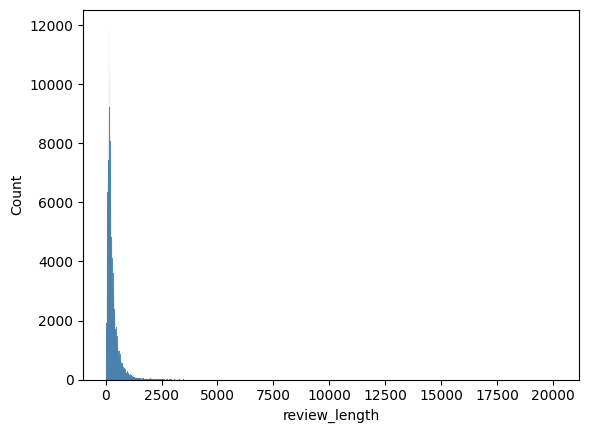

In [132]:
sns.histplot(df['review_length'])

<Axes: ylabel='review_length'>

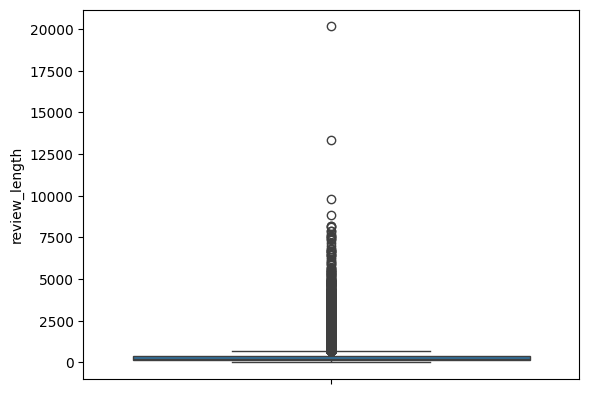

In [17]:
sns.boxplot(df['review_length'])

In [90]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ –≤—ã–≥–ª—è–¥—è—Ç –æ—Ç–∑—ã–≤—ã –±–æ–ª–µ–µ 10000 —Å–∏–º–≤–æ–ª–æ–≤
df.query('review_length > 10000')['text'].values

array(['Que si, que no...\\n–ú–Ω–æ–≥–∞–∂–¥—ã –±—ã–≤–∞–ª –≤ —ç—Ç–æ–º –∑–∞–º–µ—á–∞—Ç–µ–ª—å–Ω–æ–º –æ—Ç–µ–ª–µ, –∏ —Å –∫–∞–∂–¥—ã–º —Ä–∞–∑–æ–º –≤—Å—ë –±–æ–ª—å—à–µ –∏ –±–æ–ª—å—à–µ —ç—Ç–∞ –ø–µ—Å–Ω—è –ø—Ä–æ —Ç—É–ø—è—â–µ–≥–æ –≤–ª—é–±–ª—ë–Ω–Ω–æ–≥–æ, —è–≤–ª—è—é—â–∞—è—Å—è –≥–∏–º–Ω–æ–º –æ—Ç–µ–ª—è, –≤—Å—ë —Ç–æ—á–Ω–µ–µ –∏ —Ç–æ—á–Ω–µ–µ –æ–ø–∏—Å—ã–≤–∞–µ—Ç –∫–∞—á–µ—Å—Ç–≤–æ –æ—Ç–¥—ã—Ö–∞. –í–æ–æ–±—â–µ, —ç—Ç–æ—Ç –≥–∏–º–Ω –ø—Ä–æ—Ç–∏–≤–æ—Ä–µ—á–∏—è–º –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –æ—Ç—Ä–∞–∂–∞–µ—Ç –ø—Ä–æ–∏—Å—Ö–æ–¥—è—â–µ–µ —Å –í–∞–º–∏ –Ω–∞ –æ—Ç–¥—ã—Ö–µ –≤ –Ø–ª—Ç–∞ –ò–Ω—Ç—É—Ä–∏—Å—Ç.\\n–ù–∞—á–∏–Ω–∞–µ—Ç—Å—è –∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ —Å –æ—Å–æ–±–µ–Ω–Ω–æ—Å—Ç—è–º–∏ —Å–µ—Ä–≤–∏—Å–∞ —Å–æ —Å–ª—É–∂–±—ã —Ä–∞–∑–º–µ—â–µ–Ω–∏—è (—ç—Ç–æ —Ç–µ, –∫–æ–≥–æ –Ω–∞–∑—ã–≤–∞—é—Ç —Ä–µ—Å–µ–ø—à–Ω). –ü—Ä–∏–≤–µ—Ç–ª–∏–≤–æ—Å—Ç—å —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –Ω–∞ —Å—Ç–æ–π–∫–µ —Ä–µ–≥–∏—Å—Ç—Ä–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å –æ—Ç–¥–µ–ª—å–Ω–æ, –í–∞—Å –≤—Å–µ–≥–¥–∞ –≤—Å—Ç—Ä–µ—Ç—è—Ç —Å —É–ª—ã–±–∫–æ–π, –≤—Å—ë —Ä–∞—Å—Å–∫–∞–∂—É—Ç –∏ –æ—Ç–≤–µ—Ç—è—Ç –Ω–∞ –í–∞—à–∏ –≤–æ–ø—Ä–

In [91]:
# –ò —Ç–∞–∫–∂–µ –∫–∞–∫ –≤—ã–≥–ª—è–¥—è—Ç –æ—Ç–∑—ã–≤—ã –º–µ–Ω–µ–µ 10 —Å–∏–º–≤–æ–ª–æ–≤
df.query('review_length < 10')['text'].values

array(['–ö—Ä—É—Ç–æ', '–ö—Ä—É—Ç–æ', '–∫–∞–π—Ñ\\n', '–í—Å–µ –∫—Ä—É—Ç–æ', '–û—Ç–ª–∏—á–Ω–æ ', '–û—Ç–ª–∏—á–Ω–æ!',
       '–ü—Ä–∏–ª–∏—á–Ω–æ ', '–õ—É—á—à–∏–µ!', '–ö–ª–∞—Å!', '–ö–ª–∞—Å—Å', '–•–æ—Ä–æ—à–æ ', '–£–¥–æ–±–Ω–æ',
       '–°—É–ø–µ—Ä', '–ù–µ –ø–ª–æ—Ö–æ ', '–ù–æ—Ä–º–∞–ª—å–Ω–æ', '–°–ø–∞—Å–∏–±–æ!', '–û—Ç–ª–∏—á–Ω–æ',
       '–°–ø–∞—Å–∏–±–æ', '–ù–æ—Ä–º', '–°—Ç–∞–Ω–¥–∞—Ä—Ç.', '–ß–∏—Å—Ç–æ!', '–í—Å–µ –æ—Ç–ª', '–£–¥–æ–±–Ω–æ',
       '–•–æ—Ä–æ—à–æ', '10 –∏–∑ 10', '–û–∫', '–í–∫—É—Å–Ω–æ', '–°—É–ø–µ—Ä', '–ù–æ—Ä–º', '–í–∫—É—Å–Ω–æ',
       '–ö—Ä–∞—Å–∞–≤—Ü—ã', '–ù–µ –≤–∫—É—Å–Ω–æ', '–í—Å–µ –Ω–æ—Ä–º.', '–ü—Ä–æ—Ñ–∏!', '–û—Ç–ª–∏—á–Ω–æ.',
       '–ö—Ä—É—Ç—å', '–ß–∏—Å—Ç–æ', '–û—Ç–ª–∏—á–Ω–æ.', '–•–æ—Ä–æ—à–æ ', '–ë–æ–º–±–∞', '–í—Å—ë —Å—É–ø–µ—Ä',
       '—Ç–æ–ø —Ç–æ–ø', '–ù–æ—Ä–º', '–í–ø–æ–ª–Ω–µ!', '–í—Å—ë —á√´—Ç–∫–æ', '–í–∫—É—Å–Ω–æ', '–ö–ª–∞—Å—Å! '],
      dtype=object)

–ö–∞–∫ –≤–∏–¥–∏–º, —É –Ω–∞—Å –ø—Ä–∏—Å—É—Ç—Å—Ç–≤—É—é—Ç –≤—ã–±—Ä–æ—Å—ã (–∫–∞–∫ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–∞—è –¥–ª–∏–Ω–∞ –æ—Ç–∑—ã–≤–∞, —Ç–∞–∫ –∏ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∞—è).
–í –æ–±–æ–∏—Ö –≤–∞—Ä–∏–∞–Ω—Ç–∞—Ö –æ—Ç–∑—ã–≤—ã –ª–∏—à–µ–Ω—ã –∑–¥—Ä–∞–≤–æ–≥–æ —Å–º—ã—Å–ª–∞.
–í –¥–∞–ª—å–Ω–µ–π—à–µ–º –Ω—É–∂–Ω–æ –±—É–¥–µ—Ç —É–¥–∞–ª–∏—Ç—å —ç—Ç–∏ –≤—ã–±—Ä–æ—Å—ã –∏–∑ –¥–∞—Ç–∞—Ñ—Ä–µ–π–º–∞.

In [133]:
df_cor = df[['rating', 'review_length']]
df_cor

rating  review_length
0            3            537
1            5            158
2            1            485
3            4            142
4            5            373
...        ...            ...
499025       5             76
499026       4            295
499027       4            325
499028       5            502
499029       5            250

[499030 rows x 2 columns]

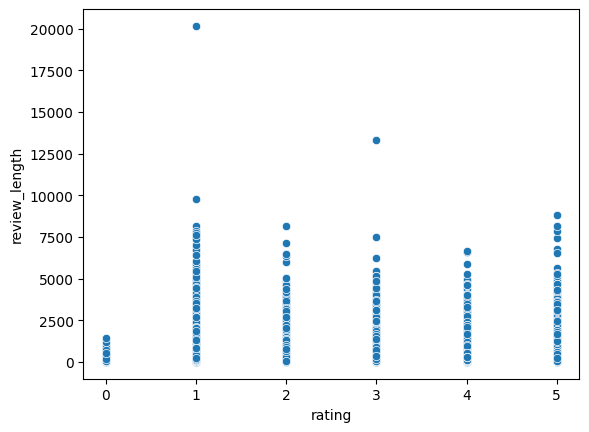

In [134]:
# –î–∏–∞–≥—Ä–∞–º–º–∞ —Ä–∞—Å—Å–µ—è–Ω–∏—è
sns.scatterplot(x='rating', y='review_length', data=df_cor)
plt.show()

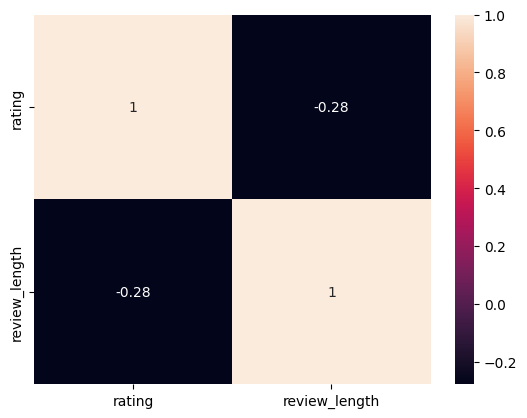

In [22]:
# –ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞
corr_matrix = df_cor.corr()

# –í–∏–∑—É–∞–ª–∏–∑–∏—Ä—É–µ–º –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# –°–æ—Ö—Ä–∞–Ω–∏–º –Ω–∞—à –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –≤ tsv —Ñ–∞–π–ª –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π —Ä–∞–±–æ—Ç—ã
df.to_csv('geo-reviews-dataset-2023.tsv', sep='\t', index=False)

### –†–∞—Å—á–µ—Ç —á–∞—Å—Ç–æ—Ç–Ω–æ—Å—Ç–∏ —Å–ª–æ–≤

–¢–µ–ø–µ—Ä—å –ø–æ—Å—á–∏—Ç–∞–µ–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤ –≤ –æ—Ç–∑—ã–≤–∞—Ö

In [ ]:
# –°–æ–±–µ—Ä–µ–º –≤—Å–µ —Ç–µ–∫—Å—Ç—ã –æ—Ç–∑—ã–≤–æ–≤ –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É
words_list_list = df['text'].to_list()
words_str = ' '.join(str(string) for string in words_list_list)

In [ ]:
# –£–¥–∞–ª–∏–º –∏–∑ —Å—Ç—Ä–æ–∫–∏ –≤—Å–µ —Å–ø–µ—Ü.—Å–∏–º–≤–æ–ª—ã
def remove_chars_from_text(text, chars):
    return "".join([char for char in text if char not in chars])

spec_chars = string.punctuation + '\n\xa0¬´¬ª\t‚Äî‚Ä¶n'

text = remove_chars_from_text(words_str, spec_chars)
text = remove_chars_from_text(text, string.digits)

# –ü—Ä–∏–≤–µ–¥–µ–º –≤—Å–µ —Å–ª–æ–≤–∞ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
text = text.lower()

In [ ]:
# –¢–æ–∫–µ–Ω–∏–∑–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç
nltk.download('punkt_tab')
text_tokens = word_tokenize(text)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [ ]:
# –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –Ω–µ–æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º


# –î–ª—è –ø—Ä–∏–º–µ–Ω–µ–Ω–∏—è –∏–Ω—Å—Ç—Ä—É–º–µ–Ω—Ç–æ–≤ —á–∞—Å—Ç–æ—Ç–Ω–æ–≥–æ –∞–Ω–∞–ª–∏–∑–∞ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ NLTK –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–ø–∏—Å–æ–∫ —Ç–æ–∫–µ–Ω–æ–≤ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞—Ç—å –∫ –∫–ª–∞—Å—Å—É Text
text = nltk.Text(text_tokens)
fdist = FreqDist(text)

print('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–µ–æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º\n')
print(f'–í—Å–µ–≥–æ —Å–ª–æ–≤: {fdist.N()}\n')
print(f'–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: {fdist.B()}\n')
print('–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: ')
most_common_words = fdist.most_common(10)
for word in most_common_words:
    print(f'{word[0]}:  {word[1]}')

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–µ–æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

–í—Å–µ–≥–æ —Å–ª–æ–≤: 21306636

–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: 742932

–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: 
–∏:  874480
–≤:  604858
–Ω–µ:  400240
–Ω–∞:  389339
–æ—á–µ–Ω—å:  298972
—Å:  289708
—á—Ç–æ:  205890
–≤—Å–µ:  170685
–Ω–æ:  141965
–ø–æ:  137147


In [ ]:
# –¢–µ–ø–µ—Ä—å –æ—á–∏—Å—Ç–∏–º —Å–ª–æ–≤–∞ –æ—Ç —Å–ª—É–∂–µ–±–Ω—ã—Ö —á–∞—Å—Ç–µ–π —Ä–µ—á–∏
nltk.download('stopwords')
russian_stopwords = stopwords.words("russian")
custom_stopwords = ['–æ—á–µ–Ω—å', '—ç—Ç–æ', '–≤—Å—ë', '–≤—Å–µ–º', '–µ—â–µ', '–µ—â—ë']
stopwords_united = russian_stopwords + custom_stopwords
text_with_no_stopwords = [word for word in text if word not in stopwords_united]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
# –ò –ø–æ—Å–º–æ—Ç—Ä–∏–º —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–æ –æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

fdist = FreqDist(text_with_no_stopwords)

print('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º\n')
print(f'–í—Å–µ–≥–æ —Å–ª–æ–≤: {fdist.N()}\n')
print(f'–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: {fdist.B()}\n')
print('–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: ')
most_common_words = fdist.most_common(10)
for word in most_common_words:
    print(f'{word[0]}:  {word[1]}')

–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –æ—á–∏—â–µ–Ω–Ω—ã–º —Å–ª–æ–≤–∞–º

–í—Å–µ–≥–æ —Å–ª–æ–≤: 14173971

–£–Ω–∏–∫–∞–ª—å–Ω—ã—Ö —Å–ª–æ–≤: 742776

–¢–æ–ø-10 —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ: 
–ø–µ—Ä—Å–æ–Ω–∞–ª:  82456
–º–µ—Å—Ç–æ:  74975
—Å–ø–∞—Å–∏–±–æ:  73776
—Ä–µ–∫–æ–º–µ–Ω–¥—É—é:  60037
–ø—Ä–æ—Å—Ç–æ:  49583
–º–∞–≥–∞–∑–∏–Ω:  46361
—Ö–æ—Ä–æ—à–∏–π:  43166
—Ü–µ–Ω—ã:  42268
–≤–∫—É—Å–Ω–æ:  40279
–±—ã—Å—Ç—Ä–æ:  40030


<Axes: xlabel='Samples', ylabel='Counts'>

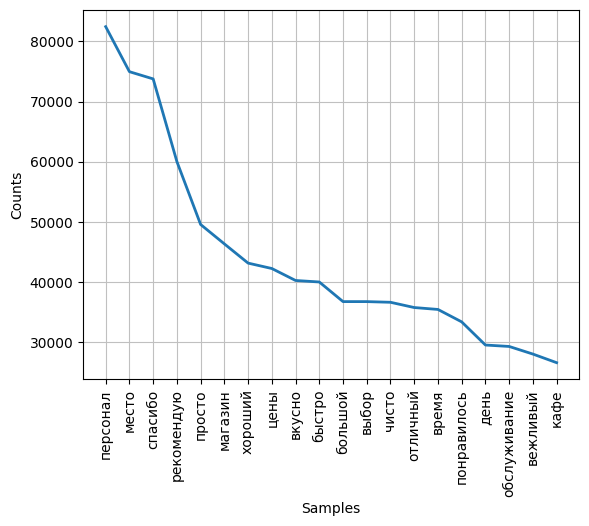

In [ ]:
# –ß—Ç–æ–±—ã –¥–æ–±–∞–≤–∏—Ç—å —Å—é–¥–∞ —á—Ç–æ-–Ω–∏–±—É–¥—å –∫—Ä–∞—Å–∏–≤–æ–µ - –Ω–∞—Ä–∏—Å—É–µ–º –≥—Ä–∞—Ñ–∏–∫ —á–∞—Å—Ç–æ—Ç—ã —Ç–æ–ø-20 –æ—á–∏—â–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤

fdist.plot(20,cumulative=False)

### –û–±–ª–∞–∫–æ —Å–ª–æ–≤

–°–æ—Å—Ç–∞–≤–∏–º –æ–±–ª–∞–∫–æ –æ—á–∏—â–µ–Ω–Ω—ã—Ö —Å–ª–æ–≤ –ø–æ —á–∞—Å—Ç–æ—Ç–µ —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è

In [ ]:
wordcloud = WordCloud(width=1200, height=600).generate_from_frequencies(fdist)

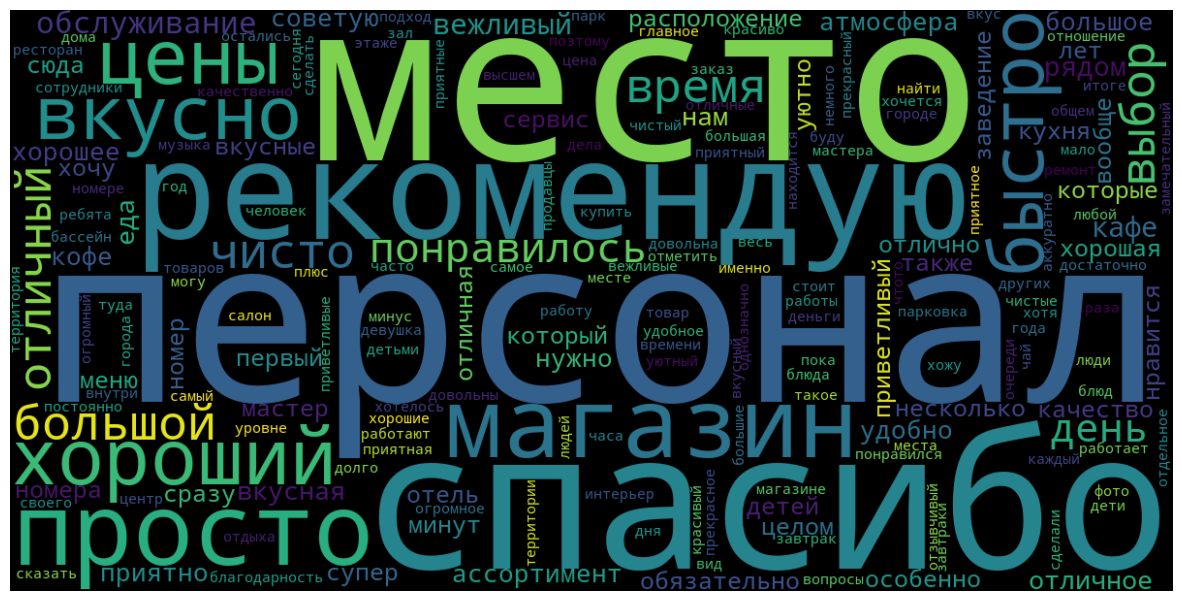

In [ ]:
plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


–í—ã–≤–æ–¥—ã –ø–æ —ç—Ç–∞–ø—É EDA:
1. –ù—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å —Å—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏
2. –ù—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å –¥—É–±–ª–∏–∫–∞—Ç—ã
3. –ù—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å —Å—Ç—Ä–æ–∫–∏ —Å –æ—Ç–∑—ã–≤–∞–º–∏ –Ω–∞ 0 –±–∞–ª–ª–æ–≤
4. –ù—É–∂–Ω–æ —É–¥–∞–ª–∏—Ç—å —Å—Ç—Ä–æ–∫–∏ —Å–æ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –∏ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–æ–π –¥–ª–∏–Ω–æ–π —Ç–µ–∫—Å—Ç–∞ –æ—Ç–∑—ã–≤–∞
5. –í–æ–∑–º–æ–∂–Ω–æ, –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–≥–æ –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–µ–π —Å—Ç–æ–∏—Ç —Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞—Ç—å –∫–ª–∞—Å—Å—ã –æ—Ç–∑—ã–≤–æ–≤ –ø–æ –∑–Ω–∞—á–µ–Ω–∏—è–º —Ä–µ–π—Ç–∏–≥–∞ 

## –ü—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∞

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499030 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        499030 non-null  object
 1   name_ru        499030 non-null  object
 2   rating         499030 non-null  int64 
 3   rubrics        499030 non-null  object
 4   text           499030 non-null  object
 5   review_length  499030 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 22.8+ MB


–°—Ç—Ä–æ–∫–∏ —Å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏ –¥—É–±–ª–∏–∫–∞—Ç—ã –±—ã–ª–∏ —É–¥–∞–ª–µ–Ω—ã –Ω–∞ –ø—Ä–æ—à–ª—ã—Ö —ç—Ç–∞–ø–∞—Ö

–ù–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤ (—É–¥–∞–ª–µ–Ω–∏–µ —Å–ø–µ—Ü—Å–∏–º–≤–æ–ª–æ–≤, –ø—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É):

In [136]:
def normalize_text(text):
    # –ü—Ä–∏–≤–µ–¥–µ–Ω–∏–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    text = text.lower()
    
    # –£–¥–∞–ª–µ–Ω–∏–µ —Å–ø–µ—Ü–∏–∞–ª—å–Ω—ã—Ö —Å–∏–º–≤–æ–ª–æ–≤
    text = re.sub(r'[^a-zA-Z–∞-—è–ê-–Ø0-9\s]', '', text)
    
    return text

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫–æ –≤—Å–µ–º –æ—Ç–∑—ã–≤–∞–º
df['text'] = df['text'].apply(normalize_text)


–û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–π (rubrics):

In [137]:
df.nunique()

address          191639
name_ru          148456
rating                6
rubrics           31724
text             498805
review_length      3004
dtype: int64

In [96]:
# C–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞—Ç—å –≤—Å–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –º–µ–Ω–µ–µ —á–µ–º –≤ 0.00021% —Å–ª—É—á–∞–µ–≤
category_counts = df['rubrics'].value_counts(normalize=True)
rare_categories = category_counts[category_counts < 0.0000021].index

rare_categories

Index(['–®–∫–æ–ª–∞ —Ç–∞–Ω—Ü–µ–≤;–°—Ç—É–¥–∏—è –π–æ–≥–∏;–°—Ç—Ä–µ—Ç—á–∏–Ω–≥',
       '–ú–∞–≥–∞–∑–∏–Ω –ø–æ–¥–∞—Ä–∫–æ–≤ –∏ —Å—É–≤–µ–Ω–∏—Ä–æ–≤;–ú—É–∑—ã–∫–∞–ª—å–Ω—ã–π –º–∞–≥–∞–∑–∏–Ω',
       '–ê–ª–∫–æ–≥–æ–ª—å–Ω–∞—è –ø—Ä–æ–¥—É–∫—Ü–∏—è –æ–ø—Ç–æ–º;–ü–∏–≤–æ–≤–∞—Ä–Ω—è, –ø–∏–≤–æ–≤–∞—Ä–µ–Ω–Ω—ã–π –∑–∞–≤–æ–¥;–ú–∞–≥–∞–∑–∏–Ω –ø–∏–≤–∞',
       '–ú–∞–≥–∞–∑–∏–Ω —ç–ª–µ–∫—Ç—Ä–æ—Ç–æ–≤–∞—Ä–æ–≤;–≠–ª–µ–∫—Ç—Ä–æ—Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∞—è –ø—Ä–æ–¥—É–∫—Ü–∏—è;–¢–æ–≤–∞—Ä—ã –¥–ª—è –¥–æ–º–∞;–ú–∞–≥–∞–∑–∏–Ω —Ö–æ–∑—Ç–æ–≤–∞—Ä–æ–≤ –∏ –±—ã—Ç–æ–≤–æ–π —Ö–∏–º–∏–∏;–ó–∞–º–∫–∏ –∏ –∑–∞–ø–æ—Ä–Ω—ã–µ —É—Å—Ç—Ä–æ–π—Å—Ç–≤–∞;–ú–∞–≥–∞–∑–∏–Ω –±—ã—Ç–æ–≤–æ–π —Ç–µ—Ö–Ω–∏–∫–∏;–°–∞–¥–æ–≤—ã–π –∏–Ω–≤–µ–Ω—Ç–∞—Ä—å –∏ —Ç–µ—Ö–Ω–∏–∫–∞',
       '–ö–µ—Ä–∞–º–∏—á–µ—Å–∫–∞—è –ø–ª–∏—Ç–∫–∞;–ò–∑–¥–µ–ª–∏—è –∏–∑ –∫–∞–º–Ω—è;–û–±–ª–∏—Ü–æ–≤–æ—á–Ω—ã–µ –º–∞—Ç–µ—Ä–∏–∞–ª—ã',
       '–î–æ—Å—Ç–∞–≤–∫–∞ –µ–¥—ã –∏ –æ–±–µ–¥–æ–≤;–ü–µ–∫–∞—Ä–Ω—è;–ë—ã—Å—Ç—Ä–æ–µ –ø–∏—Ç–∞–Ω–∏–µ;–ö–∞—Ñ–µ;–ö–æ—Ñ–µ–π–Ω—è;–¢–æ—Ä—Ç—ã –Ω–∞ –∑–∞–∫–∞–∑',
       '–¢–æ–≤–∞—Ä—ã –¥–ª—è –∏–Ω—Ç–µ—Ä—å–µ—Ä–∞;–•—É–¥–æ–∂–

In [52]:
# –û–±—ä–µ–¥–∏–Ω—è–µ–º —Ä–µ–¥–∫–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ –æ–¥–Ω—É
#df['rubrics'] = df['rubrics'].replace(rare_categories, '–ü—Ä–æ—á–∏–µ')

–£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 0

In [138]:
# –£–±–∏—Ä–∞–µ–º —Å—Ç—Ä–æ–∫–∏ —Å —Ä–µ–π—Ç–∏–Ω–≥–æ–º 0
filtered_df = df.query("rating > 0")

filtered_df.nunique()


address          191595
name_ru          148421
rating                5
rubrics           31715
text             498606
review_length      3004
dtype: int64

<Axes: xlabel='rating', ylabel='Count'>

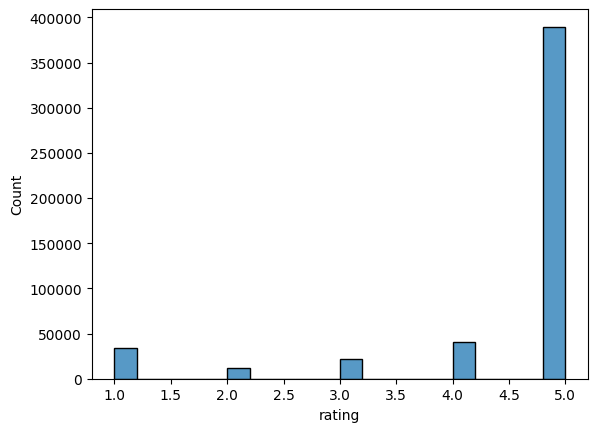

In [139]:
sns.histplot(filtered_df['rating'])


In [140]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498830 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        498830 non-null  object
 1   name_ru        498830 non-null  object
 2   rating         498830 non-null  int64 
 3   rubrics        498830 non-null  object
 4   text           498830 non-null  object
 5   review_length  498830 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ MB


–£–¥–∞–ª–∏–ª–æ—Å—å 200 —Å—Ç—Ä–æ–∫

–£–¥–∞–ª—è–µ–º —Å—Ç—Ä–æ–∫–∏ —Å–æ —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–æ–π –∏ —Å–ª–∏—à–∫–æ–º –º–∞–ª–µ–Ω—å–∫–æ–π –¥–ª–∏–Ω–æ–π —Ç–µ–∫—Å—Ç–∞ –æ—Ç–∑—ã–≤–∞

In [141]:
filtered_df = filtered_df.query('review_length < 4000')

filtered_df = filtered_df.query('review_length > 10')

In [142]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498639 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        498639 non-null  object
 1   name_ru        498639 non-null  object
 2   rating         498639 non-null  int64 
 3   rubrics        498639 non-null  object
 4   text           498639 non-null  object
 5   review_length  498639 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ MB


–£–¥–∞–ª–∏–ª–æ—Å—å –µ—â–µ 191 —Å—Ç—Ä–æ–∫–∞

<Axes: xlabel='review_length', ylabel='Count'>

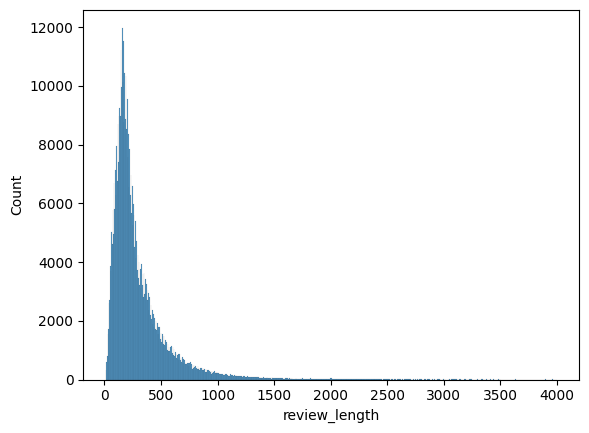

In [143]:
sns.histplot(filtered_df['review_length'])

In [144]:
print(Counter(filtered_df['rating']))

Counter({5: 389606, 4: 41096, 1: 34246, 3: 21634, 2: 12057})


–ó–∞–º–µ–Ω—è–µ–º —Å–∏–º–≤–æ–ª—ã –ø–µ—Ä–µ–Ω–æ—Å–∞ —Å—Ç—Ä–æ–∫–∏ (\\n) –Ω–∞ –ø—Ä–æ–±–µ–ª—ã:

In [153]:
work_data = filtered_df


In [151]:
work_data['text'] = work_data['text'].str.replace('\\n', ' ')

In [152]:
work_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 498639 entries, 0 to 499029
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   address        498639 non-null  object
 1   name_ru        498639 non-null  object
 2   rating         498639 non-null  int64 
 3   rubrics        498639 non-null  object
 4   text           498639 non-null  object
 5   review_length  498639 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 26.6+ MB


## –û–±—É—á–µ–Ω–∏–µ

## –°–æ–≤–µ—Ä—à–µ–Ω—Å—Ç–≤–æ–≤–∞–Ω–∏–µ

## –ê–Ω–∞–ª–∏–∑

## –ò—Ç–æ–≥

In [ ]:
print('try me my mad')